## This note book is see the types of images present in diffrent folder presnt in dataset

In [1]:
directory_path = r"C:\Users\Anime\Downloads\soul_ai\dataset"

In [2]:
import matplotlib.pyplot as plt
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
# this code dispay the image in the origanl dimenstions 
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [3]:
import os

def list_directories(path):
    return [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

# Usage:

print(list_directories(directory_path))
print(len(list_directories(directory_path)))


['ADVE', 'Email', 'Form', 'Letter', 'Memo', 'News', 'Note', 'Report', 'Resume', 'Scientific']
10


There are total 10 folders presnt in the dataset folders 

Based on the manual analysis, it seems that the images in the report, AVD, , notes and form are more on the side of the font, handwriting side. Hence, we will use some different image-to-text methods. But for the time being, we will move forward with the images that are easier to deal with.

In [12]:
list_of_tageted_folder = [ 'Email',  'Letter', 'Memo', 'News','Resume', 'Scientific']

In [13]:
import os

list_of_targeted_folders = ['Email', 'Letter', 'Memo', 'News',  'Resume', 'Scientific']
base_dir = directory_path

image_extensions = ['.jpg', '.jpeg'] 

for folder in list_of_targeted_folders:
    folder_path = os.path.join(base_dir, folder)
    image_count = 0

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if os.path.splitext(filename)[1].lower() in image_extensions:
            image_count += 1

    print(f'Folder: {folder}, Number of images: {image_count}')

# Print total number of images
print(f'Total number of images: {sum([image_count for folder in list_of_targeted_folders])}')


Folder: Email, Number of images: 599
Folder: Letter, Number of images: 567
Folder: Memo, Number of images: 620
Folder: News, Number of images: 189
Folder: Resume, Number of images: 120
Folder: Scientific, Number of images: 261
Total number of images: 1566


In [14]:
import random
# Randomly select a folder
random_folder = random.choice(list_of_targeted_folders)
folder_path = os.path.join(base_dir, random_folder)

# List to store all image paths in the randomly selected folder
folder_image_paths = []

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image
    if os.path.splitext(filename)[1].lower() in image_extensions:
        image_path = os.path.join(folder_path, filename)
        folder_image_paths.append(image_path)

# Check if there are any images in the folder
if folder_image_paths:
    # Randomly select an image
    random_image_path = random.choice(folder_image_paths)
    print(f'Randomly selected image: {random_image_path}')
else:
    print(f'No images found in folder: {random_folder}')

Randomly selected image: C:\Users\Anime\Downloads\soul_ai\dataset\Scientific\2062058903.jpg


Converting the code in a function so that we can you when ever we want to test overall system on a single image of the given dataset

In [16]:
import os
import random

def get_random_image_path(directory_path):
    list_of_targeted_folders = ['Email', 'Letter', 'Memo', 'News',  'Resume', 'Scientific']

    image_extensions = ['.jpg', '.jpeg']

    # Randomly select a folder
    random_folder = random.choice(list_of_targeted_folders)
    folder_path = os.path.join(directory_path, random_folder)

    # List to store all image paths in the randomly selected folder
    folder_image_paths = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if os.path.splitext(filename)[1].lower() in image_extensions:
            image_path = os.path.join(folder_path, filename)
            folder_image_paths.append(image_path)

    # Check if there are any images in the folder
    if folder_image_paths:
        # Randomly select an image
        random_image_path = random.choice(folder_image_paths)
        return random_image_path
    else:
        return None


In [26]:
image_path = get_random_image_path(directory_path)

print(f"Randonly selected image is {image_path}")



Randonly selected image is C:\Users\Anime\Downloads\soul_ai\dataset\Email\2505940096.jpg


This is the function randomly select the image from the dataset it select any 5 images which is then we have slice one but the modified version is the above done that can gerate the image from dataset

In [18]:
import os
import random

def random_images_from_directory(directory_path, num_images):
    images = [f for f in os.listdir(directory_path) if f.endswith(".jpg")]
    
    if len(images) < num_images:
        raise ValueError(f"There are only {len(images)} images in {directory_path}. Cannot select {num_images}.")

    random_images = random.sample(images, num_images)
    image_paths = [os.path.join(directory_path, img) for img in random_images]
    
    return image_paths

num_images_to_select = 5  # Adjust this number as needed

try:
    selected_images = random_images_from_directory(image_path, num_images_to_select)
    print("Randomly selected images:")
    for image in selected_images:
        print(image)
except ValueError as e:
    print(e)


Randomly selected images:
C:\Users\Anime\Downloads\soul_ai\dataset\ADVE\91505342_5343.jpg
C:\Users\Anime\Downloads\soul_ai\dataset\ADVE\96324864.jpg
C:\Users\Anime\Downloads\soul_ai\dataset\ADVE\2043025626.jpg
C:\Users\Anime\Downloads\soul_ai\dataset\ADVE\2084426710_6711.jpg
C:\Users\Anime\Downloads\soul_ai\dataset\ADVE\2045081234.jpg


In [19]:
selected_images[0]

'C:\\Users\\Anime\\Downloads\\soul_ai\\dataset\\ADVE\\91505342_5343.jpg'

In [20]:
random_selected_image_path =selected_images[0]

## this is for theimage 

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image

image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image to a standard size (optional)
gray = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# Apply GaussianBlur to reduce noise
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply thresholding
_, binary_image = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Apply morphological transformations to enhance the image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
morphed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Edge detection
edges = cv2.Canny(morphed_image, 100, 200)

# Save the processed image
preprocessed_image_path = "preprocessed_image.jpg"
cv2.imwrite(preprocessed_image_path, edges)

# Display the original and processed images
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Preprocessed Image')
plt.imshow(edges, cmap='gray')
plt.show()

# Provide the path to the preprocessed image
preprocessed_image_path


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [25]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Load the image
image_path = random_selected_image_path
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Resize the image to a standard size (optional)
gray = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)

# Apply GaussianBlur to reduce noise
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply thresholding
_, binary_image = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# Apply morphological transformations to enhance the image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
morphed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Edge detection
edges = cv2.Canny(morphed_image, 100, 200)

# Save the processed image
preprocessed_image_path = "preprocessed_image_1.jpg"
cv2.imwrite(preprocessed_image_path, edges)

# Display the original and processed images
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Preprocessed Image')
plt.imshow(edges, cmap='gray')
plt.show()

# Extract text from original image
original_text = pytesseract.image_to_string(image)
print("Text from Original Image:\n", original_text)

# Extract text from preprocessed image
preprocessed_image = cv2.imread(preprocessed_image_path)
preprocessed_text = pytesseract.image_to_string(preprocessed_image)
print("\nText from Preprocessed Image:\n", preprocessed_text)

# Compare the texts
if original_text == preprocessed_text:
    print("\nThe extracted texts are identical.")
else:
    print("\nThe extracted texts are different.")

# Provide the paths to the original and preprocessed images
original_image_path = image_path
preprocessed_image_path = preprocessed_image_path


NameError: name 'random_selected_image_path' is not defined

In [23]:
import re

def clean_text(extracted_text):
    # Remove multiple spaces
    cleaned_text = re.sub(r'\s+', ' ', extracted_text)
    
    # Remove leading and trailing spaces
    cleaned_text = cleaned_text.strip()
    
    # Ensure proper sentence spacing and punctuation
    cleaned_text = re.sub(r' ([.,!?])', r'\1', cleaned_text)
    
    # Handle line breaks for better readability
    cleaned_text = re.sub(r'(?<!\n)\n(?!\n)', ' ', cleaned_text)
    
    # Normalize spacing
    cleaned_text = re.sub(r'\n{2,}', '\n\n', cleaned_text)

    return cleaned_text

# Example usage with text extracted from an image
original_text =original_text

formatted_text = clean_text(original_text)
print("Formatted Text:\n", formatted_text)


Formatted Text:
 IMAGE NOT AVAILABLE ONLINE The material referenced in the associated index listing is available in the Minnesota Tobacco Document Depository. Please see this website's home page for additional information regarding the Depository.


In [25]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample text
text =relevant_text

# 1. Tokenization
words = nltk.word_tokenize(text)

# 2. Lowercasing
words = [word.lower() for word in words]

# 3. Removing Punctuation
words = [word for word in words if word.isalnum()]

# 4. Removing Stop Words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# 5. Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]

# 6. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

# 7. Removing Non-Alphanumeric Characters (already done in step 3)

# 8. Removing Extra Spaces (handled by tokenization)

# Join processed words into a single string
processed_text = ' '.join(lemmatized_words)

print("Processed Text:\n", processed_text)


Processed Text:
 


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


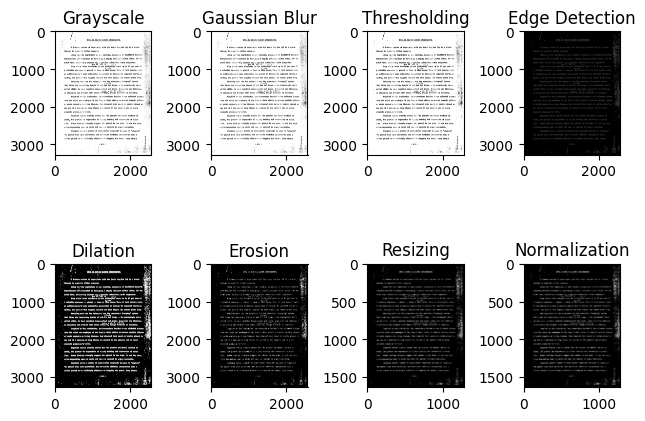

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = r"C:\Users\Anime\Downloads\soul_ai\dataset\Scientific\01142172_01142173.jpg"
image = cv2.imread(image_path)

# Step 1: Grayscale Conversion
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(2, 4, 1)
plt.title('Grayscale')
plt.imshow(gray, cmap='gray')

# Step 2: Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.subplot(2, 4, 2)
plt.title('Gaussian Blur')
plt.imshow(blurred, cmap='gray')

# Step 3: Thresholding
_, thresholded = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)
plt.subplot(2, 4, 3)
plt.title('Thresholding')
plt.imshow(thresholded, cmap='gray')

# Step 4: Edge Detection
edges = cv2.Canny(thresholded, 100, 200)
plt.subplot(2, 4, 4)
plt.title('Edge Detection')
plt.imshow(edges, cmap='gray')

# Step 5: Dilation
kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(edges, kernel, iterations=1)
plt.subplot(2, 4, 5)
plt.title('Dilation')
plt.imshow(dilated, cmap='gray')

# Step 6: Erosion
eroded = cv2.erode(dilated, kernel, iterations=1)
plt.subplot(2, 4, 6)
plt.title('Erosion')
plt.imshow(eroded, cmap='gray')

# Step 7: Resizing
resized = cv2.resize(eroded, (image.shape[1] // 2, image.shape[0] // 2))
plt.subplot(2, 4, 7)
plt.title('Resizing')
plt.imshow(resized, cmap='gray')

# Step 8: Normalization
normalized = cv2.normalize(resized, None, 0, 255, cv2.NORM_MINMAX)
plt.subplot(2, 4, 8)
plt.title('Normalization')
plt.imshow(normalized, cmap='gray')

plt.tight_layout()
plt.show()


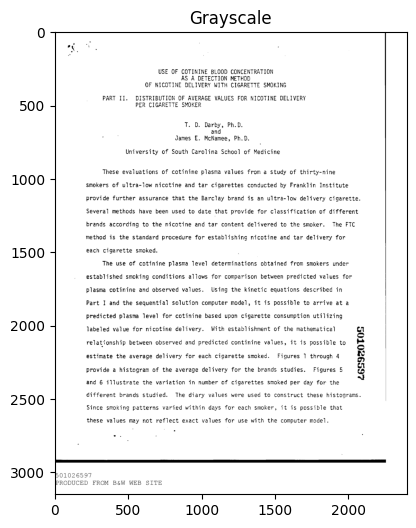

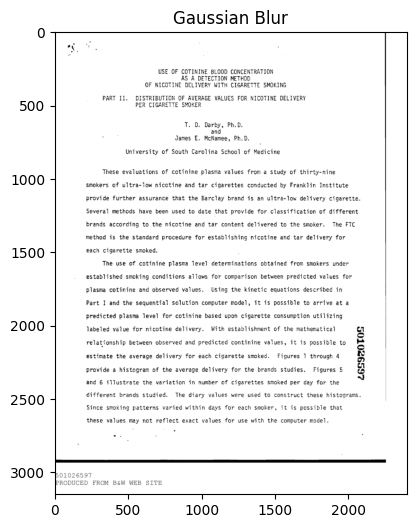

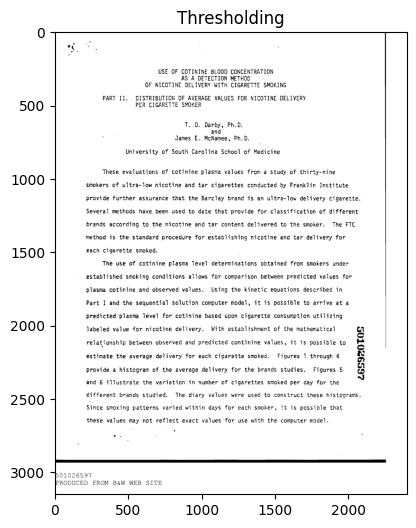

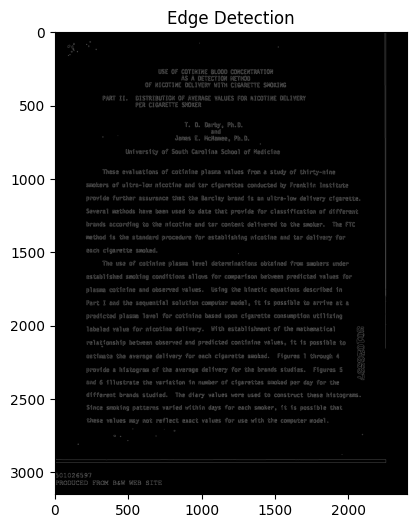

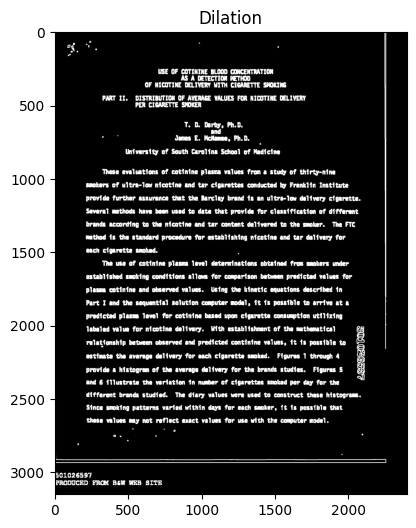

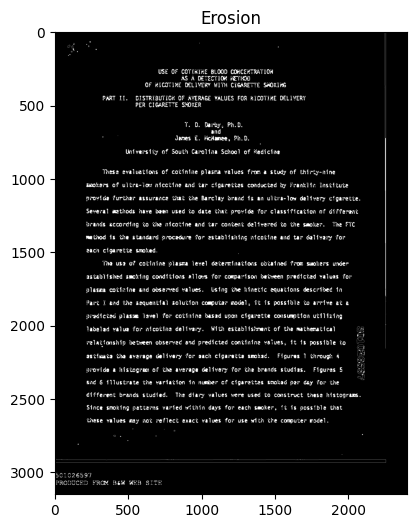

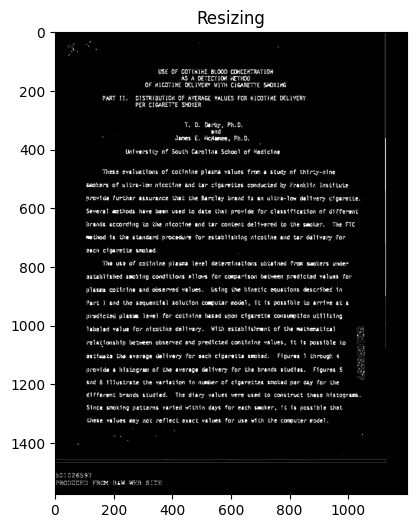

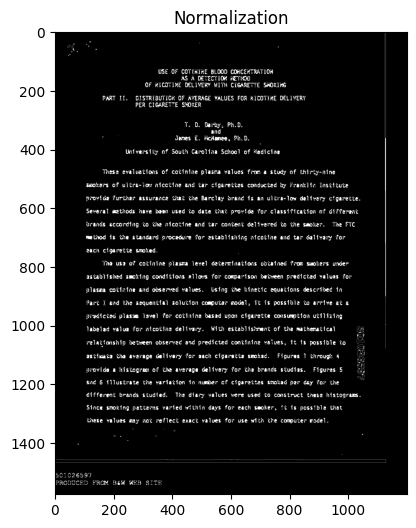

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = r"C:\Users\Anime\Downloads\soul_ai\dataset\Report\569669.jpg"
image = cv2.imread(image_path)

def show_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.show()

# Grayscale Conversion
def convert_to_grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    show_image('Grayscale', gray)
    return gray

# Gaussian Blur
def apply_gaussian_blur(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    show_image('Gaussian Blur', blurred)
    return blurred

# Thresholding
def apply_thresholding(image):
    _, thresholded = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
    show_image('Thresholding', thresholded)
    return thresholded

# Edge Detection
def detect_edges(image):
    edges = cv2.Canny(image, 100, 200)
    show_image('Edge Detection', edges)
    return edges

# Dilation
def apply_dilation(image):
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(image, kernel, iterations=1)
    show_image('Dilation', dilated)
    return dilated

# Erosion
def apply_erosion(image):
    kernel = np.ones((5, 5), np.uint8)
    eroded = cv2.erode(image, kernel, iterations=1)
    show_image('Erosion', eroded)
    return eroded

# Resizing
def resize_image(image, scale_x=0.5, scale_y=0.5):
    resized = cv2.resize(image, (0, 0), fx=scale_x, fy=scale_y)
    show_image('Resizing', resized)
    return resized

# Normalization
def normalize_image(image):
    normalized = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    show_image('Normalization', normalized)
    return normalized

# Example usage:
gray_image = convert_to_grayscale(image)
blurred_image = apply_gaussian_blur(gray_image)
thresholded_image = apply_thresholding(blurred_image)
edges_image = detect_edges(thresholded_image)
dilated_image = apply_dilation(edges_image)
eroded_image = apply_erosion(dilated_image)
resized_image = resize_image(eroded_image)
normalized_image = normalize_image(resized_image)


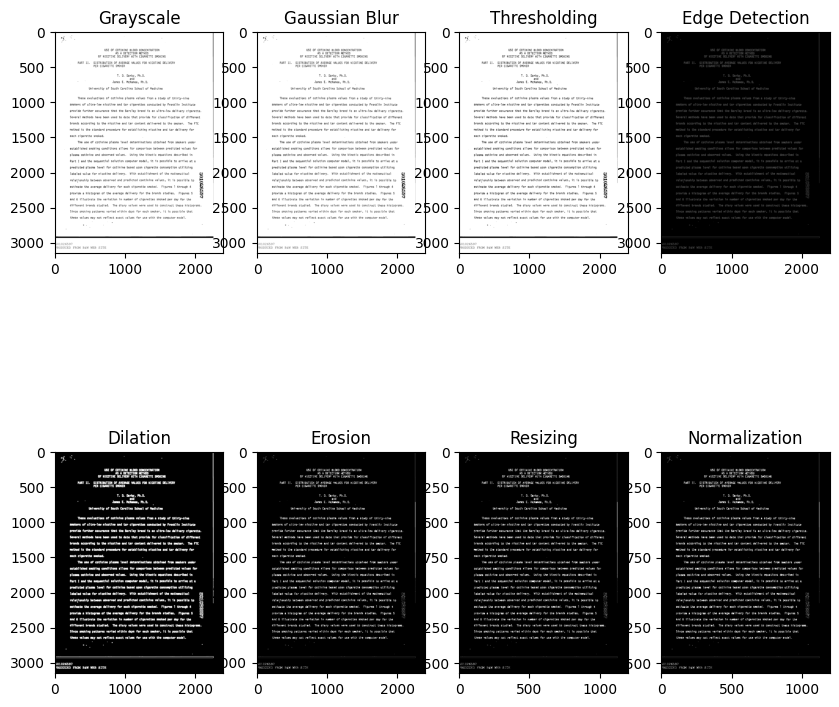

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image_path = r"C:\Users\Anime\Downloads\soul_ai\dataset\Report\569669.jpg"
image = cv2.imread(image_path)

def show_images(titles, images, n_rows, n_cols):
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 10))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
    plt.show()

# Grayscale Conversion
def convert_to_grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

# Gaussian Blur
def apply_gaussian_blur(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred

# Thresholding
def apply_thresholding(image):
    _, thresholded = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
    return thresholded

# Edge Detection
def detect_edges(image):
    edges = cv2.Canny(image, 100, 200)
    return edges

# Dilation
def apply_dilation(image):
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(image, kernel, iterations=1)
    return dilated

# Erosion
def apply_erosion(image):
    kernel = np.ones((5, 5), np.uint8)
    eroded = cv2.erode(image, kernel, iterations=1)
    return eroded

# Resizing
def resize_image(image, scale_x=0.5, scale_y=0.5):
    resized = cv2.resize(image, (0, 0), fx=scale_x, fy=scale_y)
    return resized

# Normalization
def normalize_image(image):
    normalized = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    return normalized

# Example usage:
gray_image = convert_to_grayscale(image)
blurred_image = apply_gaussian_blur(gray_image)
thresholded_image = apply_thresholding(blurred_image)
edges_image = detect_edges(thresholded_image)
dilated_image = apply_dilation(edges_image)
eroded_image = apply_erosion(dilated_image)
resized_image = resize_image(eroded_image)
normalized_image = normalize_image(resized_image)

# Display images side by side
titles = ['Grayscale', 'Gaussian Blur', 'Thresholding', 'Edge Detection', 'Dilation', 'Erosion', 'Resizing', 'Normalization']
images = [gray_image, blurred_image, thresholded_image, edges_image, dilated_image, eroded_image, resized_image, normalized_image]
show_images(titles, images, 2, 4)  # 2 rows, 4 columns


In [69]:
import cv2
import pytesseract

# Load the image
image_path = r"C:\Users\Anime\Downloads\soul_ai\dataset\Report\569669.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresholded_image = cv2.threshold(gray_image, 150, 255, cv2.THRESH_BINARY)

# OCR with custom parameters
custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789abcdefghijklmnopqrstuvwxyz'
extracted_text = pytesseract.image_to_string(thresholded_image, config=custom_config, lang='eng')

print("Extracted Text:\n", extracted_text)


Extracted Text:
 00n
s
01
0fe1
1t0
tdarbyph
and
damescameeh
niversityofoutharolinachoolofedicine

heseevaluationsofcotinineplasmavaluesfromastudyofthirtynine
smokersofultralownicotineandtarcigarettesconductedbyranklininstitute
providefurtherassurancethatthearclaybrandisanultralowdeliverycigarette
severalmethodshavebeenusedtodate that provideforclassificationofdifferent
brandsaccordingtothenicotineandtarcontentdeliveredtothesmokerhe
methodisthestandardprocedureforestablishingnicotineandtardeliveryfor
eachcigarettesmoked

theuseofcotinineplasmaleveldeterminationsobtainedfromsmokersunder

establishedsmokingconditionsallowsforcomparisonbetweenpredictedvaluesfor
plasmacotinineandobservedvaluessingthekineticequationsdescribedin
artandthesequentialsolutioncomputermodelitispossibletoarriveata
predictedplasmalevelforcotininebaseduponcigaretteconsumptionutilizing
labeledvaluefornicotinedeliverywithestablishmentofthemathematical oe
relationshipbetweenobservedandpredictedcontininevaluesitispossibl

In [70]:
simpe_text_extraction = pytesseract.pytesseract.image_to_string(gray_image)

In [71]:
simpe_text_extraction

'USE OF COTININE BLOOD CONCENTRATION\nAS A DETECTION METHOD\nOF NICOTINE DELIVERY WITH CIGARETTE SMOKING\nPART IIT. DISTRIBUTION OF AVERAGE VALUES FOR NICOTINE DELIVERY\nPER CIGARETTE SMOKER\n\nT. D. Darby, Ph.D.\nand\nJames £. McNamee, Ph.D.\n\nUniversity of South Carolina School of Medicine\n\nThese evaluations of cotinine plasma values from a study of thirty-nine\nsmokers of ultra-low nicotine and tar cigarettes conducted by Franklin Institute\nprovide further assurance that the Barclay brand is an ultra-low delivery cigarette.\nSeveral methods have been used to date that provide for classification of different\nbrands according to the nicotine and tar content delivered to the smoker. The FTC\nmethod is the standard procedure for establishing nicotine and tar delivery for\neach cigarette smoked.\n\nThe use of cotinine plasma level determinations obtained from smokers under\nestablished smoking conditions allows for comparison between predicted values for\nplasma cotinine and observe

In [72]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Sample text
text =simpe_text_extraction

# 1. Tokenization
words = nltk.word_tokenize(text)

# 2. Lowercasing
words = [word.lower() for word in words]

# 3. Removing Punctuation
words = [word for word in words if word.isalnum()]

# 4. Removing Stop Words
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# 5. Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]

# 6. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

# 7. Removing Non-Alphanumeric Characters (already done in step 3)

# 8. Removing Extra Spaces (handled by tokenization)

# Join processed words into a single string
processed_text = ' '.join(lemmatized_words)

print("Processed Text:\n", processed_text)


Processed Text:
 use cotinine blood concentration detection method nicotine delivery cigarette smoking part iit distribution average value nicotine delivery per cigarette smoker darby james mcnamee university south carolina school medicine evaluation cotinine plasma value study smoker nicotine tar cigarette conducted franklin institute provide assurance barclay brand delivery cigarette several method used date provide classification different brand according nicotine tar content delivered smoker ftc method standard procedure establishing nicotine tar delivery cigarette smoked use cotinine plasma level determination obtained smoker established smoking condition allows comparison predicted value plasma cotinine observed value using kinetic equation described part sequential solution computer model possible arrive predicted plasma jevel cotinine based upon cigarette consumption utilizing labeled value nicotine delivery establishment mathematical relationship observed predicted continine v

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [73]:
processed_text

'use cotinine blood concentration detection method nicotine delivery cigarette smoking part iit distribution average value nicotine delivery per cigarette smoker darby james mcnamee university south carolina school medicine evaluation cotinine plasma value study smoker nicotine tar cigarette conducted franklin institute provide assurance barclay brand delivery cigarette several method used date provide classification different brand according nicotine tar content delivered smoker ftc method standard procedure establishing nicotine tar delivery cigarette smoked use cotinine plasma level determination obtained smoker established smoking condition allows comparison predicted value plasma cotinine observed value using kinetic equation described part sequential solution computer model possible arrive predicted plasma jevel cotinine based upon cigarette consumption utilizing labeled value nicotine delivery establishment mathematical relationship observed predicted continine value possible es

## This will we the image processing will done here  part 

intersing part is that the image orientation can be founf using the openCV and then the image can be used to detect the image 

method 1 -Histogram of Oriented Gradients (HOG): You can use HOG to detect the orientation of lines and edges in the image. Once you have the orientation, you can rotate the image accordingly.
method -2 Projection Profile Analysis: You can use projection profile analysis to detect the orientation of text in the image. Once you have the orientation, you can rotate the image accordingly. Here's


will be one sub problem to solve and see the more optimistic way to resolve this problem statement 


In [5]:
import matplotlib.pyplot as plt

def show_images(titles, images, n_rows, n_cols):
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 10))
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
    plt.show()


In [6]:
import cv2

def rotate_image(image, angle):
    # Get the image dimensions
    (h, w) = image.shape[:2]

    # Calculate the center of the image
    center = (w // 2, h // 2)

    # Create a rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Perform the rotation
    rotated = cv2.warpAffine(image, M, (w, h))

    return rotated


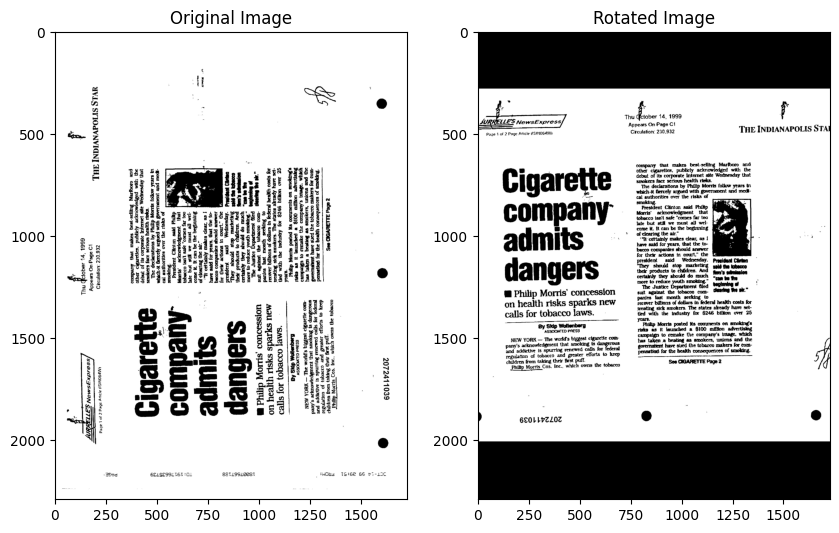

In [7]:

import cv2
image_path = r"C:\Users\Anime\Downloads\soul_ai\dataset\News\2072411039_1040.jpg"
image = cv2.imread(image_path)
angle = 270  # replace with your desired angle of rotation
rotated_image = rotate_image(image, angle)

# Convert the images to grayscale for displaying using matplotlib
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_rotated_image = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# Display the original and rotated images side by side
titles = ['Original Image', 'Rotated Image']
images = [gray_image, gray_rotated_image]
show_images(titles, images, 1, 2)  # 1 row, 2 columns
